In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score

In [5]:
# Configure GPU memory growth to prevent OOM errors
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(f"Error setting memory growth: {e}")

# Check for GPU availability
tf.keras.mixed_precision.set_global_policy('mixed_float16')

print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Parameters
max_features = 50000  # Size of vocabulary
maxlen = 500  # Maximum sequence length
embedding_dims = 128  # Embedding dimension
batch_size = 256
epochs = 10

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# RNN Model

Training model...
Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.5744 - loss: 0.6700 - val_accuracy: 0.8113 - val_loss: 0.4446
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.7979 - loss: 0.4641 - val_accuracy: 0.8360 - val_loss: 0.3896
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 607ms/step - accuracy: 0.8420 - loss: 0.3897 - val_accuracy: 0.8356 - val_loss: 0.3850
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.8606 - loss: 0.3472 - val_accuracy: 0.8286 - val_loss: 0.3970
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 86s 881ms/step - accuracy: 0.8900 - loss: 0.2873 - val_accuracy: 0.7710 - val_loss: 0.4970
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9146 - loss: 0.2330 - val_accuracy: 0.8046 - val_loss: 0.4573
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 840ms/step - accuracy: 0.9499 - loss: 0.1586 - val_accuracy: 0.8038 - val_loss: 0.5985
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 89s 907ms/step - accuracy: 0.9647 - loss: 0.1141 

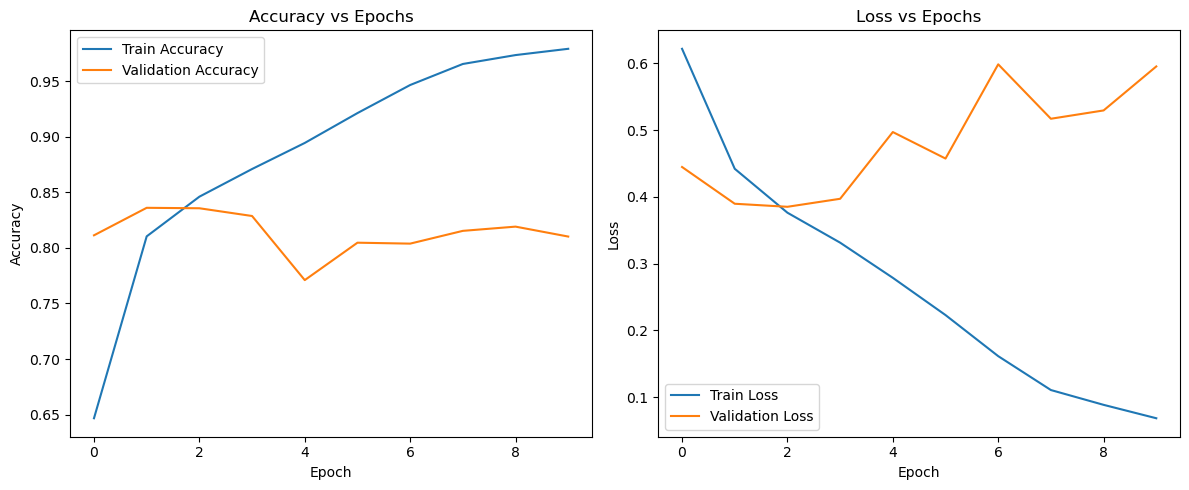

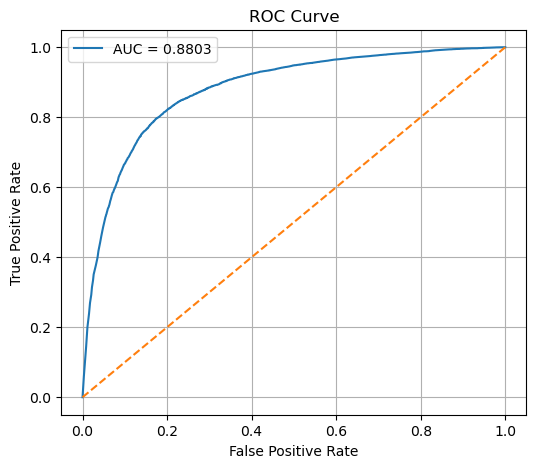

In [ ]:
# Build the RNN model
model = Sequential()
model.add(Embedding(max_features, embedding_dims))
model.add(SimpleRNN(32, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

# Train the model
print("Training model...")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

# Evaluate the model and calculate metrics
y_prob = model.predict(x_test, verbose=0).ravel()
y_pred = (y_prob > 0.5).astype(int)
y_true = y_test

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

print(f"\nFinal Evaluation on Test Set:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")

# Visualizations
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Epochs")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs Epochs")

plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# LTSM Model

Training model...
Epoch 1/10


98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.5697 - loss: 0.6786 - val_accuracy: 0.7120 - val_loss: 0.5474
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.7611 - loss: 0.5076 - val_accuracy: 0.8326 - val_loss: 0.3936
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.8211 - loss: 0.4136 - val_accuracy: 0.8370 - val_loss: 0.3844
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - accuracy: 0.8513 - loss: 0.3646 - val_accuracy: 0.8429 - val_loss: 0.3926
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - accuracy: 0.8653 - loss: 0.3341 - val_accuracy: 0.8439 - val_loss: 0.3589
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.8746 - loss: 0.3067 - val_accuracy: 0.8750 - val_loss: 0.3017
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 0.8827 - loss: 0.2949 - val_accuracy: 0.8774 - val_loss: 0.3080
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.8907 - loss: 0.2771 - val_accuracy: 0.862

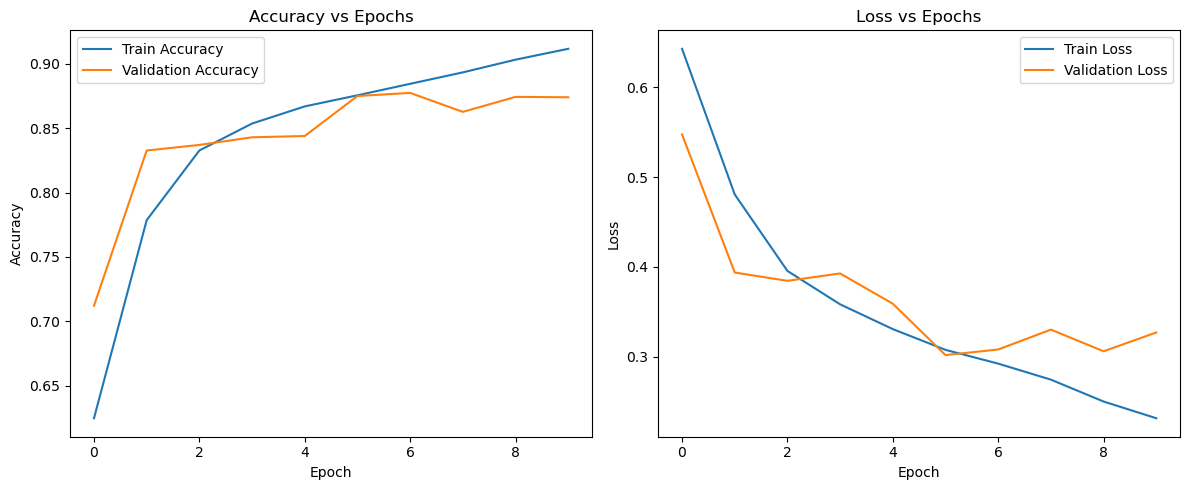

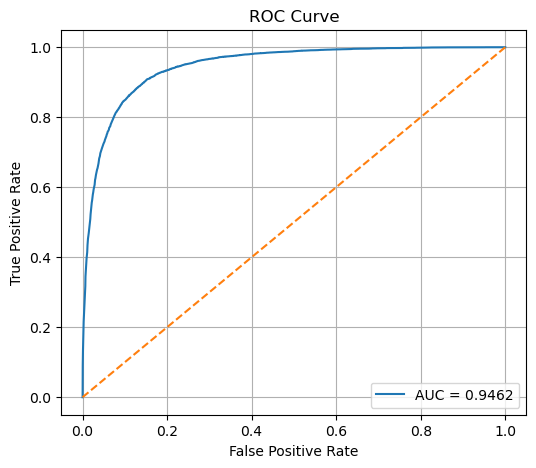

In [7]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(max_features, embedding_dims))
model.add(tf.keras.layers.LSTM(32, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

# Train the model
print("Training model...")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

# Evaluate the model and calculate metrics
y_prob = model.predict(x_test, verbose=0).ravel()
y_pred = (y_prob > 0.5).astype(int)
y_true = y_test

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

print(f"\nFinal Evaluation on Test Set:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")

# Visualizations
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Epochs")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs Epochs")

plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# GRU Model

Training model...
Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 158ms/step - accuracy: 0.5553 - loss: 0.6820 - val_accuracy: 0.7451 - val_loss: 0.5121
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 207ms/step - accuracy: 0.7375 - loss: 0.5722 - val_accuracy: 0.7672 - val_loss: 0.4739
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.8101 - loss: 0.4331 - val_accuracy: 0.8246 - val_loss: 0.3876
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 197ms/step - accuracy: 0.8357 - loss: 0.3897 - val_accuracy: 0.8232 - val_loss: 0.3982
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.8505 - loss: 0.3612 - val_accuracy: 0.7577 - val_loss: 0.5459
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.8654 - loss: 0.3267 - val_accuracy: 0.8617 - val_loss: 0.3275
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.8809 - loss: 0.3006 - val_accuracy: 0.8228 - val_loss: 0.4566
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 137ms/step - accuracy: 0.8900 - loss:

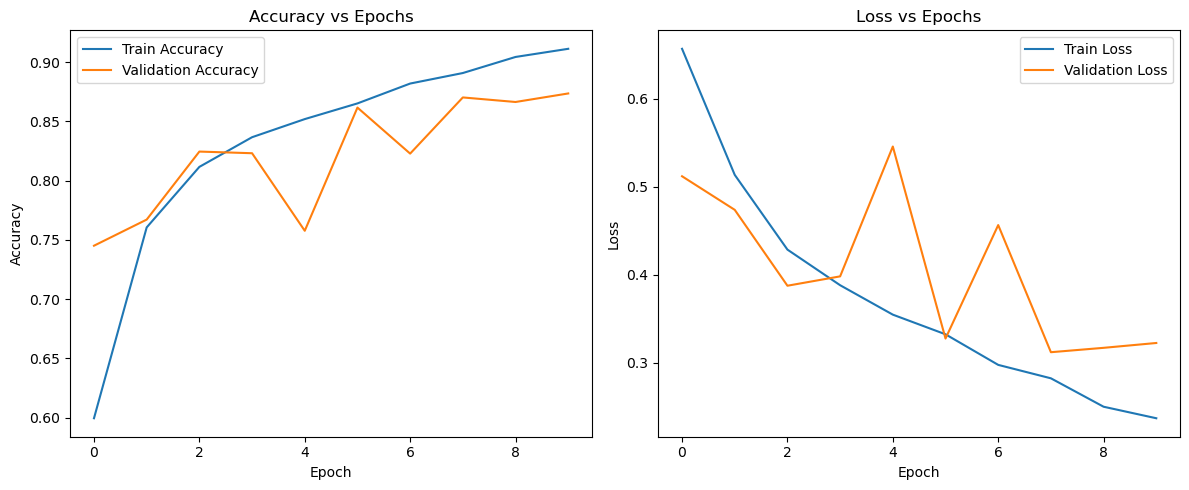

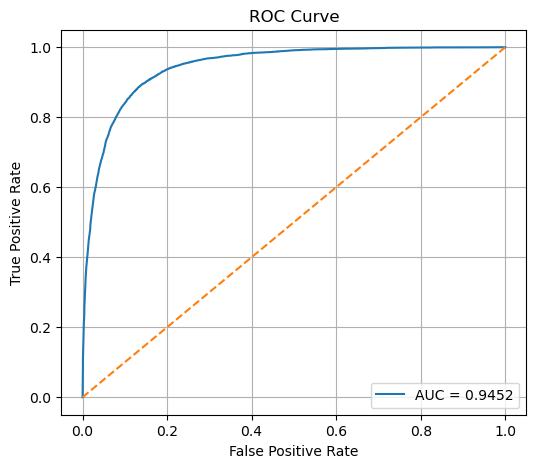

In [8]:
# Build the GRU model
model = Sequential()
model.add(Embedding(max_features, embedding_dims))
model.add(tf.keras.layers.GRU(32, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

# Train the model
print("Training model...")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

# Evaluate the model and calculate metrics
y_prob = model.predict(x_test, verbose=0).ravel()
y_pred = (y_prob > 0.5).astype(int)
y_true = y_test

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

print(f"\nFinal Evaluation on Test Set:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")

# Visualizations
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Epochs")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs Epochs")

plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Penjelasan Model, Visualisasi, dan Metrik

## 1. RNN (Recurrent Neural Network)

RNN menggunakan mekanisme **recurrence** untuk mengolah data urut seperti teks atau waktu. Formula utama yang digunakan dalam RNN adalah:

### Persamaan Dasar:
- **State Update**:
  $$
  h_t = f(W_h \cdot h_{t-1} + W_x \cdot x_t + b)
  $$
  - **Penjelasan**:
    - \($h_t$\): State tersembunyi pada waktu \(t\).
    - \($x_t$\): Input saat waktu \(t\).
    - \($W_h$\), \($W_x$\): Matriks bobot untuk state sebelumnya dan input saat ini.
    - \($b$\): Bias.
    - \($f$\): Fungsi aktivasi (contoh: tanh atau ReLU).

### Alur:
Pada setiap langkah waktu, RNN memperbarui state tersembunyi \($h_t$\) menggunakan input saat itu \($x_t$\) dan state sebelumnya \($h_{t-1}$\).

---

## 2. LSTM (Long Short-Term Memory)

LSTM mengatasi masalah **vanishing gradient** yang sering dialami RNN dengan menggunakan **gate mechanism**.

### Persamaan Dasar:
1. **Forget Gate**:
   $$
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
   $$
   - **Fungsi**: Memutuskan informasi mana yang harus dibuang dari memori.

2. **Input Gate**:
   $$
   i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
   $$
   $$
   \tilde{C}_t = \text{tanh}(W_C \cdot [h_{t-1}, x_t] + b_C)
   $$
   - **Fungsi**: Menghitung memori baru yang akan ditambahkan.

3. **Cell State Update**:
   $$
   C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t
   $$
   - **Fungsi**: Memperbarui state sel.

4. **Output Gate**:
   $$
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
   $$
   $$
   h_t = o_t \cdot \text{tanh}(C_t)
   $$
   - **Fungsi**: Menghitung keluaran berdasarkan state sel yang diperbarui.

---

## 3. GRU (Gated Recurrent Unit)

GRU adalah versi sederhana dari LSTM tanpa cell state terpisah. Persamaan yang digunakan:

### Persamaan Dasar:
1. **Reset Gate**:
   $$
   r_t = \sigma(W_r \cdot [h_{t-1}, x_t] + b_r)
   $$
   - **Fungsi**: Memutuskan informasi masa lalu yang harus dilupakan.

2. **Update Gate**:
   $$
   z_t = \sigma(W_z \cdot [h_{t-1}, x_t] + b_z)
   $$
   - **Fungsi**: Mengontrol berapa banyak informasi dari masa lalu yang akan dibawa ke state saat ini.

3. **State Update**:
   $$
   \tilde{h}_t = \text{tanh}(W_h \cdot [r_t \odot h_{t-1}, x_t] + b_h)
   $$
   $$
   h_t = (1 - z_t) \cdot h_{t-1} + z_t \cdot \tilde{h}_t
   $$
   - **Fungsi**: State tersembunyi diperbarui menggunakan reset dan update gate.

---

## 4. Visualisasi

### Akurasi:
Akurasi dihitung sebagai:
$$
\text{Accuracy} = \frac{\text{Jumlah Prediksi Benar}}{\text{Total Sampel}}
$$

### Loss:
Loss dalam pelatihan model dihitung menggunakan fungsi **Binary Cross Entropy (BCE)**:
$$
\text{BCE Loss} = -\frac{1}{N} \sum_{i=1}^{N} \big[y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)\big]
$$
- \($y_i$\): Label sebenarnya.
- \($\hat{y}_i$\): Probabilitas prediksi model.

### ROC Curve:
ROC Curve menunjukkan hubungan antara **True Positive Rate (TPR)** dan **False Positive Rate (FPR)**:
- **TPR**:
  $$
  TPR = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  $$
- **FPR**:
  $$
  FPR = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
  $$

### AUC (Area Under Curve):
AUC mengukur area di bawah ROC Curve:
$$
\text{AUC} = \int_{0}^{1} TPR(FPR) \,dFPR
$$
Nilai AUC berkisar antara 0 hingga 1, dengan 1 menunjukkan prediksi sempurna.

---

## 5. Metrik

### Precision:
Precision mengukur seberapa tepat model dalam prediksi kelas positif:
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

### Recall:
Recall mengukur kemampuan model untuk mendeteksi semua kelas positif:
$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

### F1 Score:
F1 Score adalah rata-rata harmonis antara precision dan recall:
$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

# Penjelasan Matematika TensorFlow (RNN, LSTM, GRU)

## 1. Embedding Layer
Layer **Embedding** digunakan untuk memetakan indeks kata menjadi representasi vektor terdistribusi yang dapat dipelajari:
$$
E(x_t) = W_{embedding} \cdot x_t
$$
- **Dimensi**:
  - \($x_t$\): Input berupa indeks kata, berukuran \($(\text{batch\_size}, \text{sequence\_length})$\).
  - \($W_{embedding}$\): Matriks bobot berukuran \($(\text{vocab\_size}, \text{embed\_dim})$\).
  - Output: Tensor berukuran \($(\text{batch\_size}, \text{sequence\_length}, \text{embed\_dim})$\).

Embedding ini secara otomatis diperbarui selama pelatihan untuk menghasilkan representasi semantik dari kata-kata.

---

## 2. Recurrent Neural Network (RNN)
RNN memproses data sekuensial dengan memanfaatkan hubungan temporal antar elemen.

### Persamaan Dasar:
$$
h_t = \text{tanh}(W_{ih} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h)
$$
- **Penjelasan**:
  - \($h_t$\): State tersembunyi pada waktu \($t$\).
  - \($W_{ih}$\): Bobot antara input dan state tersembunyi (\($embed\_dim \to hidden\_dim$\)).
  - \($W_{hh}$\): Bobot antara state tersembunyi sebelumnya (\($hidden\_dim \to hidden\_dim$\)).
  - \($b_h$\): Bias.
  - \($\text{tanh}$\): Fungsi aktivasi untuk mengontrol non-linearitas.

### Bidirectional RNN:
RNN dapat bersifat bidirectional, yang berarti memproses data dalam dua arah (maju dan mundur). Hal ini memungkinkan model untuk menangkap informasi dari konteks sebelum dan sesudah:
$$
h_t^{fwd} = \text{tanh}(W_{ih} \cdot x_t + W_{hh} \cdot h_{t-1}^{fwd} + b_h)
$$
$$
h_t^{bwd} = \text{tanh}(W_{ih} \cdot x_t + W_{hh} \cdot h_{t+1}^{bwd} + b_h)
$$
$$
h_t = [h_t^{fwd}, h_t^{bwd}]
$$
Di kode, RNN diganti dengan `layers.SimpleRNN`.

---

## 3. Long Short-Term Memory (LSTM)
LSTM adalah pengembangan dari RNN yang menggunakan mekanisme gate untuk menangani masalah **vanishing gradient**.

### Persamaan Dasar:
1. **Forget Gate**:
   $$
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
   $$
   - Mengontrol informasi mana yang harus dilupakan.

2. **Input Gate**:
   $$
   i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
   $$
   $$
   \tilde{C}_t = \text{tanh}(W_C \cdot [h_{t-1}, x_t] + b_C)
   $$
   - Mengontrol informasi baru yang masuk ke memori.

3. **Cell State Update**:
   $$
   C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t
   $$
   - Memperbarui state sel.

4. **Output Gate**:
   $$
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
   $$
   $$
   h_t = o_t \cdot \text{tanh}(C_t)
   $$
   - Mengontrol keluaran berdasarkan state sel yang diperbarui.

### Bidirectional LSTM:
Sama seperti RNN, LSTM dapat dibuat bidirectional untuk menangkap konteks sekuensial secara penuh.

Di kode, LSTM diimplementasikan menggunakan `layers.LSTM`.

---

## 4. Gated Recurrent Unit (GRU)
GRU adalah versi lebih ringan dari LSTM, dengan mekanisme gate yang lebih sederhana.

### Persamaan Dasar:
1. **Reset Gate**:
   $$
   r_t = \sigma(W_{r} \cdot [h_{t-1}, x_t] + b_{r})
   $$
   - Mengontrol seberapa banyak informasi lama yang dilupakan.

2. **Update Gate**:
   $$
   z_t = \sigma(W_{z} \cdot [h_{t-1}, x_t] + b_{z})
   $$
   - Mengontrol seberapa banyak informasi baru yang ditambahkan.

3. **State Update**:
   $$
   \tilde{h}_t = \text{tanh}(W_{h} \cdot [r_t \odot h_{t-1}, x_t] + b_{h})
   $$
   $$
   h_t = (1 - z_t) \cdot h_{t-1} + z_t \cdot \tilde{h}_t
   $$

### Bidirectional GRU:
Bidirectional GRU menggunakan dua GRU, maju dan mundur, untuk memproses data sekuensial:
$$
h_t = [h_t^{fwd}, h_t^{bwd}]
$$
Di kode, GRU diimplementasikan menggunakan `layers.GRU`.

---

## 5. Global Max Pooling
Global Max Pooling mengubah sekuens menjadi representasi tetap:
$$
\text{GlobalMaxPool}(x) = \max(x_t), \forall t
$$
- **Dimensi**:
  - Input: \($(\text{batch\_size}, \text{sequence\_length}, \text{feature\_dim})$\).
  - Output: \($(\text{batch\_size}, \text{feature\_dim})$\).

---

## 6. Dense Layer
Dense layer digunakan untuk transformasi linier:
$$
y_t = W \cdot x_t + b
$$
- \($W$\): Matriks bobot (\($feature\_dim \to 1$\)).
- \($b$\): Bias.

Fungsi aktivasi seperti `sigmoid` digunakan untuk menghasilkan probabilitas:
$$
\hat{y}_t = \sigma(y_t)
$$

---

## 7. Binary Cross-Entropy Loss
Loss dihitung menggunakan:
$$
\text{BCE Loss} = -\frac{1}{N} \sum_{i=1}^{N} \big[y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)\big]
$$
- \($y_i$\): Label benar (0 atau 1).
- \($\hat{y}_i$\): Probabilitas prediksi.

---

## 8. Gradient Clipping
Gradient clipping digunakan untuk menghindari exploding gradients:
$$
\text{Gradient Clipping: } g_i = \min\big(g_i, \text{threshold}\big)
$$
- Memastikan gradient berada dalam batas tertentu.

---